In [1]:
import pandas as pd
import numpy as np
import cv2
from skimage.morphology import skeletonize
from skimage.util import invert
import matplotlib.pyplot as plt
from skimage.morphology import disk, square, erosion, dilation, area_closing, remove_small_objects
import scipy.ndimage as ndi

In [4]:
!ls ../../Data/TRAIN

'004 Osmia lignaria f right 4x.jpg'
'013 Osmia texana m right 4x.jpg'
'105 Lasioglossum pilosum f left 4x.jpg'
'1062 Agapostemon texanus f right 3.2x.jpg'
'106 Lasioglossum zephyrum f right 4x.jpg'
'1118 Osmia lignaria lignaria f right 4x.jpg'
'112 Lasioglossum leucozonium f left 3.2x.jpg'
'1165 Agapostemon texanus f left 3.2x.jpg'
'119 Lasioglossum rohweri f left 4x.jpg'
'1220 Osmia lignaria propinqua f right 4x.jpg'
'133 Lasioglossum nymphaerum f left 4x.jpg'
'133 Lasioglossum nymphaerum f right 4x.jpg'
'149 Lasioglossum rohweri f left 4x.jpg'
'154 Lasioglossum nymphaerum f left 4x.jpg'
'154 Lasioglossum nymphaerum f right 4x.jpg'
'173 Lasioglossum rohweri f left 4x.jpg'
'193 Megachile latimanus f right 4x.jpg'
'1 Lasioglossum leucozonium f right 3.2x.jpg'
'385 Lasioglossum leucozonium f left 3.2x.jpg'
'41 Lasioglossum rohweri f right 4x.jpg'
'49 Lasioglossum pilosum f right 4x.jpg'
'50 Lasioglossum rohweri f right 4x.jpg'
'62 Lasioglossum rohweri f right 4x.jpg'
'65 Lasioglossum nym

In [2]:
# first data, read CSV + image
path = '../../Data/'
f_img = cv2.imread(path + 'ex04.jpg')
gray_f_img = cv2.cvtColor(f_img, cv2.COLOR_BGR2GRAY)
f_gt = pd.read_csv(path + 'ex04.csv', header=None)

In [5]:
f_gt

,0,1
0,404.0,726.0
1,456.0,632.0
2,456.0,1193.0
3,458.0,746.0
4,495.0,657.0
5,524.0,1000.0
6,568.0,596.0
7,600.0,1077.0
8,666.0,1837.0
9,668.0,1230.0


In [6]:
def plot_img(img, gt, title):
    xs = list(gt[0])
    ys = list(gt[1])
    plt.figure(figsize=(10,8))
    plt.title(title)
    plt.imshow(img, cmap='gray')
    for idx in range(len(xs)):
        j, i = ys[idx], xs[idx]
        plt.scatter(j, i, color='r')
    plt.show()

In [7]:
gray_f_img

array([[145, 145, 146, ..., 165, 165, 165],
       [147, 147, 147, ..., 165, 165, 165],
       [149, 149, 148, ..., 165, 165, 165],
       ...,
       [145, 145, 145, ..., 161, 162, 162],
       [144, 143, 143, ..., 161, 161, 161],
       [143, 142, 141, ..., 161, 161, 161]], dtype=uint8)

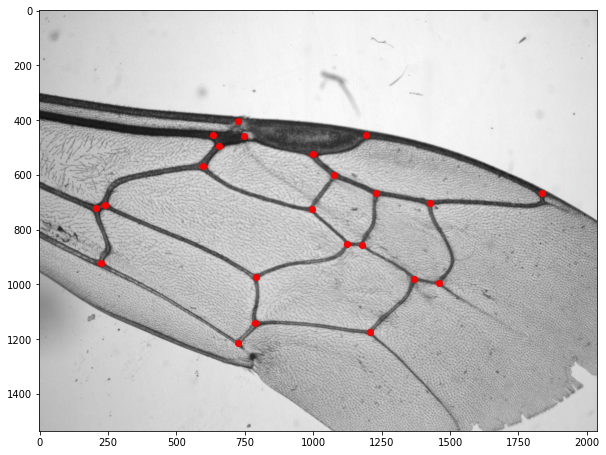

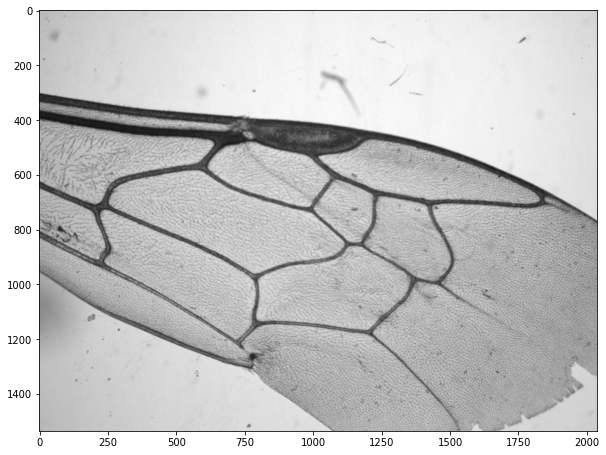

In [10]:
plot_img(gray_f_img, f_gt, title='')

plt.figure(figsize=(10, 8))
plt.imshow(gray_f_img, cmap='gray');

In [12]:
laplacian = cv2.Laplacian(gray_f_img, cv2.CV_64F)
sobelx = cv2.Sobel(gray_f_img, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray_f_img, cv2.CV_64F, 0, 1, ksize=5)

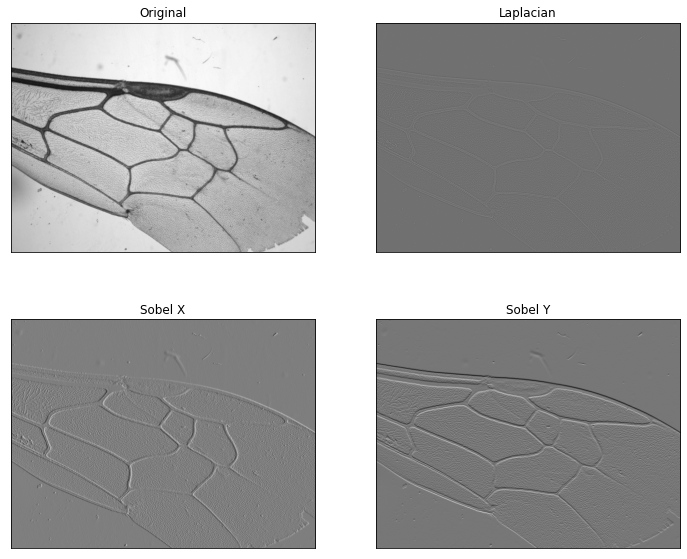

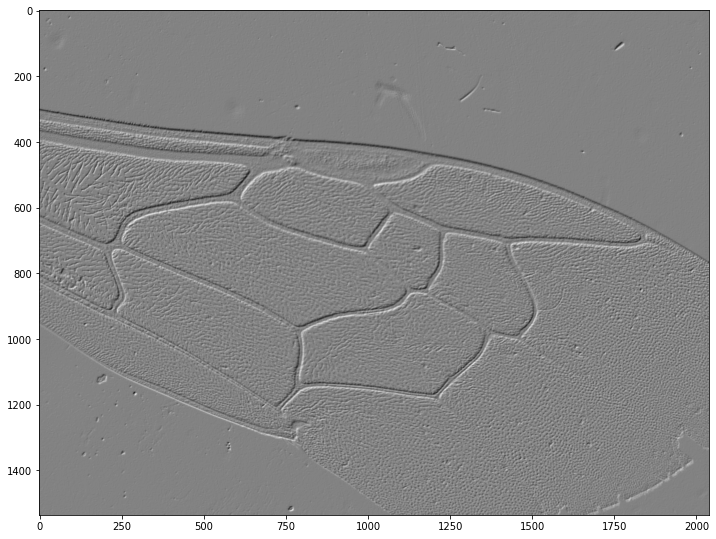

In [17]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1), plt.imshow(gray_f_img, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 3), plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4), plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(12, 10))
plt.imshow(sobelx + sobely, cmap='gray')
plt.show()

In [95]:
img_sobel_sum = sobelx + sobely

In [107]:
def display_window(img, w, h, w_size):
    plt.imshow(img[h-w_size:h+w_size, w-w_size:w+w_size], cmap='gray')
    plt.show()

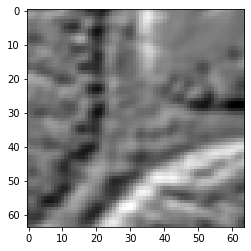

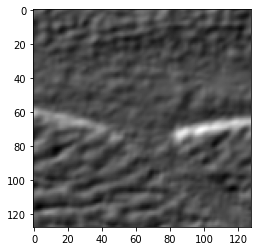

In [119]:
rows = list(f_gt[0])
cols = list(f_gt[1])

w, h = 790, 1140
display_window(img_sobel_sum, w, h, 32)

w, h = int(cols[5]), int(rows[5]) 
display_window(img_sobel_sum, w, h, 64)

In [93]:
# extract window data
rows = list(f_gt[0])
cols = list(f_gt[1])
window_size = 64

for i in range(len(rows)):
    r, c = int(rows[i]), int(cols[i])
    

([404.0,
  456.0,
  456.0,
  458.0,
  495.0,
  524.0,
  568.0,
  600.0,
  666.0,
  668.0,
  704.0,
  710.0,
  723.0,
  725.0,
  852.0,
  855.0,
  921.0,
  973.0,
  979.0,
  996.0,
  1143.0,
  1174.0,
  1214.0],
 [726.0,
  632.0,
  1193.0,
  746.0,
  657.0,
  1000.0,
  596.0,
  1077.0,
  1837.0,
  1230.0,
  1426.0,
  239.0,
  206.0,
  994.0,
  1124.0,
  1177.0,
  223.0,
  789.0,
  1367.0,
  1460.0,
  787.0,
  1208.0,
  726.0])

In [89]:
from skimage import util, feature

# define window size
window_size = 80

# get next multiple of 128
h_size, w_size = img_sobel_sum.shape

# create padding function
get_pad_nb = lambda img_size, window_size: window_size - (img_size % window_size)
pad_nb_height = get_pad_nb(h_size, window_size) if h_size % window_size != 0 else 0
pad_nb_width = get_pad_nb(w_size, window_size) if w_size % window_size != 0 else 0

img_padded = np.pad(img_sobel_sum, \
                    pad_width=((pad_nb_height, 0), (pad_nb_width, 0)), \
                    mode='minimum')
img_padded.shape

(1600, 2080)

In [85]:
import numpy as np
from skimage.util import view_as_blocks

blocks_img = view_as_blocks(img_padded, (window_size, window_size))
blocks_img.shape

(20, 26, 80, 80)

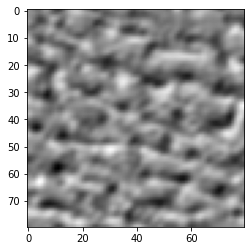

In [87]:
plt.imshow(blocks_img[10, 10], cmap='gray')

In [7]:
# threshold image
threshold_val = 95
ret, img = cv2.threshold(gray_f_img, threshold_val, 255, 0)

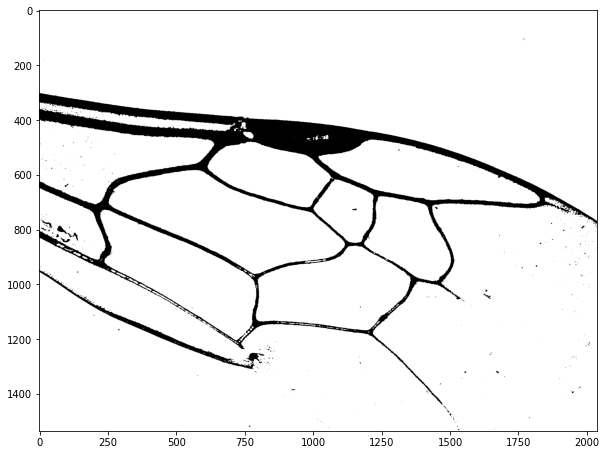

In [8]:
plt.figure(figsize=(10, 8))
plt.imshow(img, cmap='gray')
plt.show()

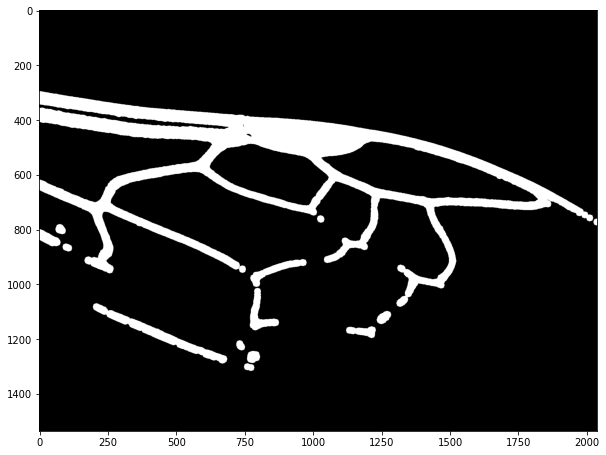

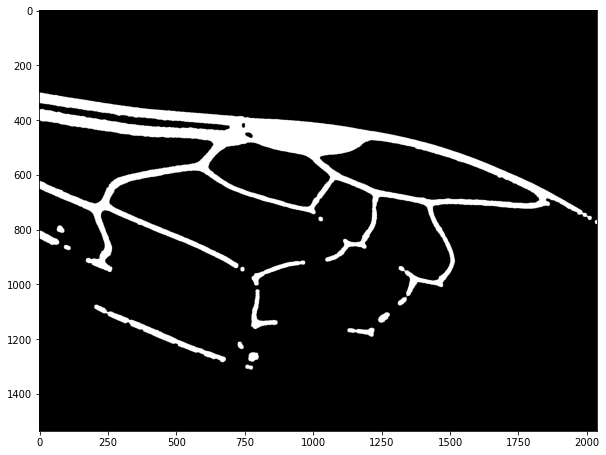

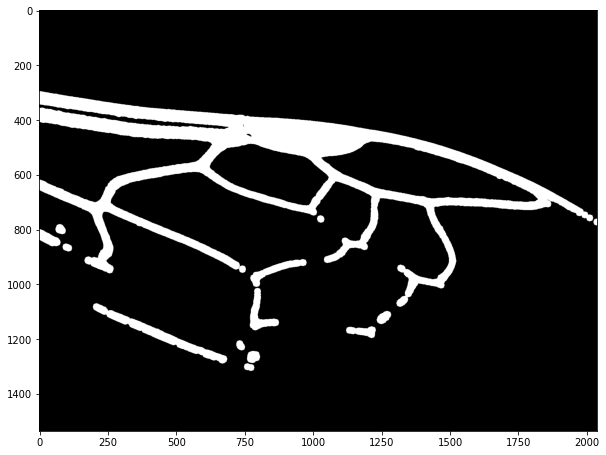

In [11]:
image = invert(img)
tmp = dilation(tmp, square(5))
plt.figure(figsize=(10, 8))
plt.imshow(tmp, cmap='gray')
plt.show()

tmp = erosion(tmp, disk(5))
plt.figure(figsize=(10, 8))
plt.imshow(tmp, cmap='gray')
plt.show()

tmp = dilation(tmp, disk(5))
plt.figure(figsize=(10, 8))
plt.imshow(tmp, cmap='gray')
plt.show()

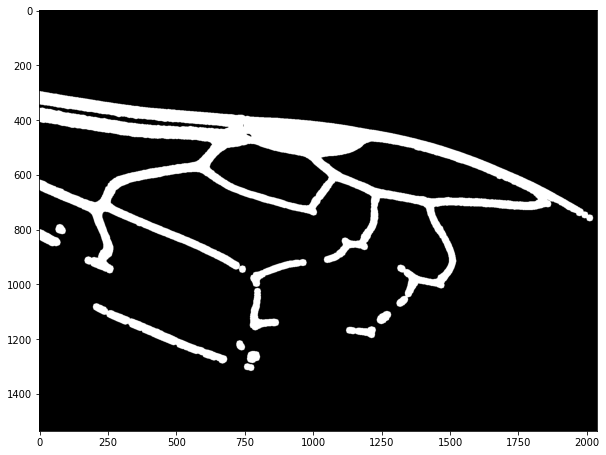

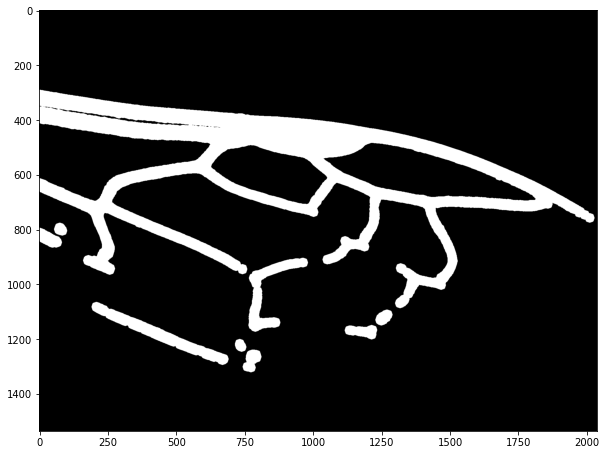

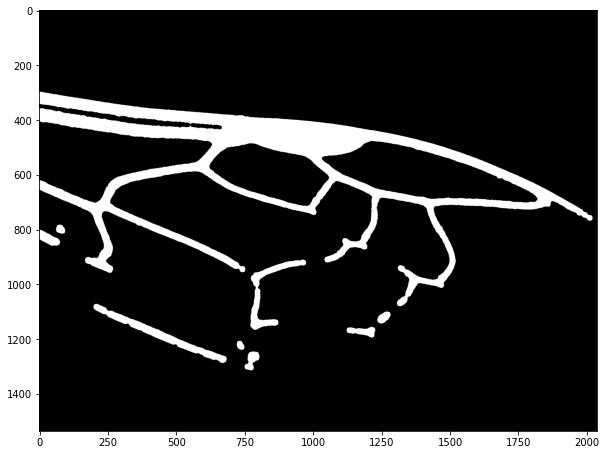

In [12]:
tmp_bin = (tmp > 0).copy()
tmp_bin = remove_small_objects(tmp_bin, min_size=800)
plt.figure(figsize=(10, 8))
plt.imshow(tmp_bin, cmap='gray')
plt.show()

# apply little dilation
tmp_bin = dilation(tmp_bin, disk(5))
plt.figure(figsize=(10, 8))
plt.imshow(tmp_bin, cmap='gray')
plt.show()

# apply erosion
tmp_bin = erosion(tmp_bin, disk(7))
plt.figure(figsize=(10, 8))
plt.imshow(tmp_bin, cmap='gray')
plt.show()

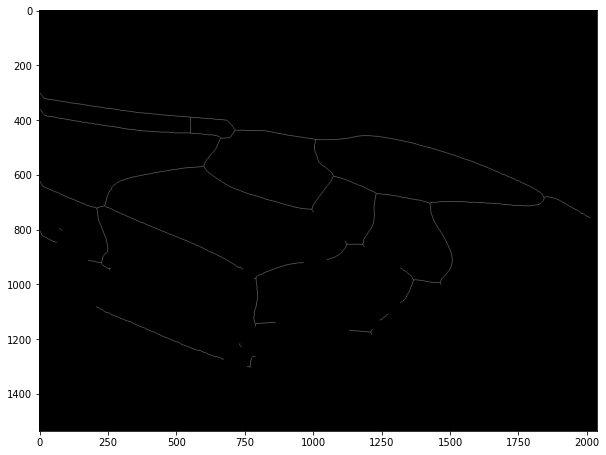

In [15]:
skeleton = skeletonize(tmp_bin)
plt.figure(figsize=(10,8))
plt.imshow(skeleton, cmap='gray')
plt.show()

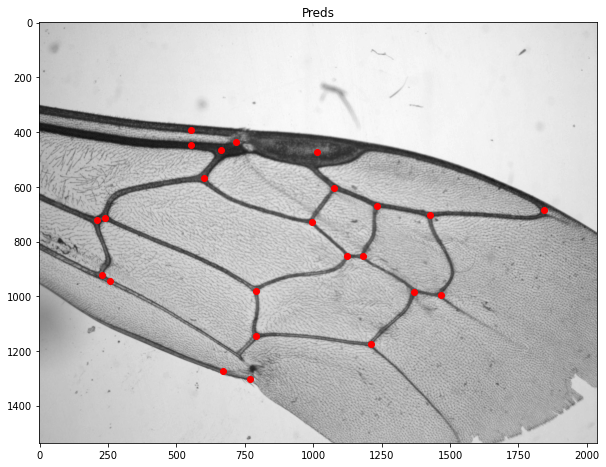

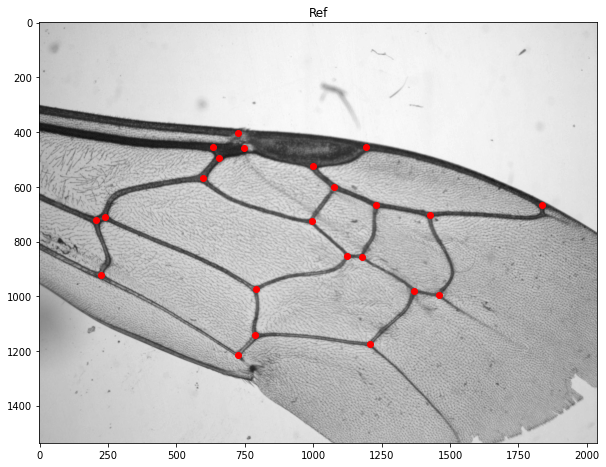

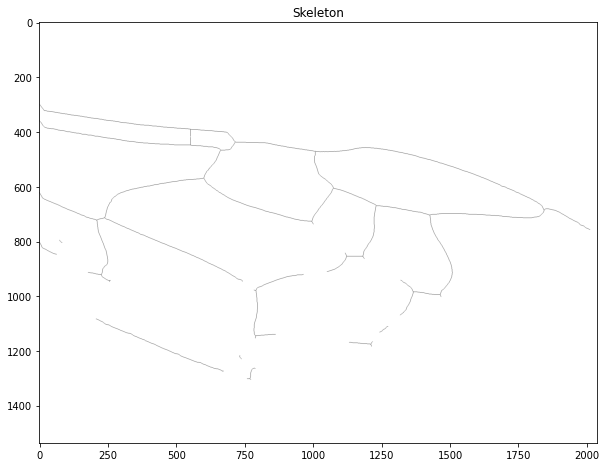

In [17]:
branches = np.zeros_like(skeleton, dtype=bool)
branches.shape

selems = list()
selems.append(np.array([[0, 1, 0], [1, 1, 1], [0, 0, 0]]))
selems.append(np.array([[1, 0, 1], [0, 1, 0], [1, 0, 0]]))
selems.append(np.array([[1, 0, 1], [0, 1, 0], [0, 1, 0]]))
selems.append(np.array([[0, 1, 0], [1, 1, 0], [0, 0, 1]]))
selems.append(np.array([[0, 0, 1], [1, 1, 1], [0, 1, 0]]))
selems = [np.rot90(selems[i], k=j) for i in range(5) for j in range(4)]

selems.append(np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
selems.append(np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]]))

for selem in selems:
    branches |= ndi.binary_hit_or_miss(skeleton, selem)
    
res = np.where(branches == True)

# build pandas datafram
data = {
    0: list(res[0]),
    1: list(res[1])
}
df_res = pd.DataFrame(data)

plot_img(gray_f_img, df_res, title='Preds')
plot_img(gray_f_img, f_gt, title='Ref')

plt.figure(figsize=(10,8))
plt.title('Skeleton')
plt.imshow(np.invert(skeleton), cmap='gray')
plt.show()